In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [15]:
df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
df_train['date']

0          2013-01-01
1          2013-01-01
2          2013-01-01
3          2013-01-01
4          2013-01-01
              ...    
3000883    2017-08-15
3000884    2017-08-15
3000885    2017-08-15
3000886    2017-08-15
3000887    2017-08-15
Name: date, Length: 3000888, dtype: object

In [26]:
print(df_train.date.unique())
days = len(df_train.date.unique())
print('Number of days in dataset:',days)

['2013-01-01' '2013-01-02' '2013-01-03' ... '2017-08-13' '2017-08-14'
 '2017-08-15']
Number of days in dataset: 1684


In [28]:
print(df_train.family.unique())
n_groups = len(df_train.family.unique())
print('Number of types of product sold:',n_groups)

['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']
Number of types of product sold: 33


In [65]:
print(df_train.store_nbr.unique())
n_stores = len(df_train.store_nbr.unique())
print('Number of stores:',n_stores)

[ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52
 53 54  6  7  8  9]
Number of stores: 54


In [16]:
df_train['id'].size

3000888

In [35]:
total_sales = sum(df_train['sales'])
total_sales

1073644952.2030932

In [37]:
df_train['sales'].max()

124717.0

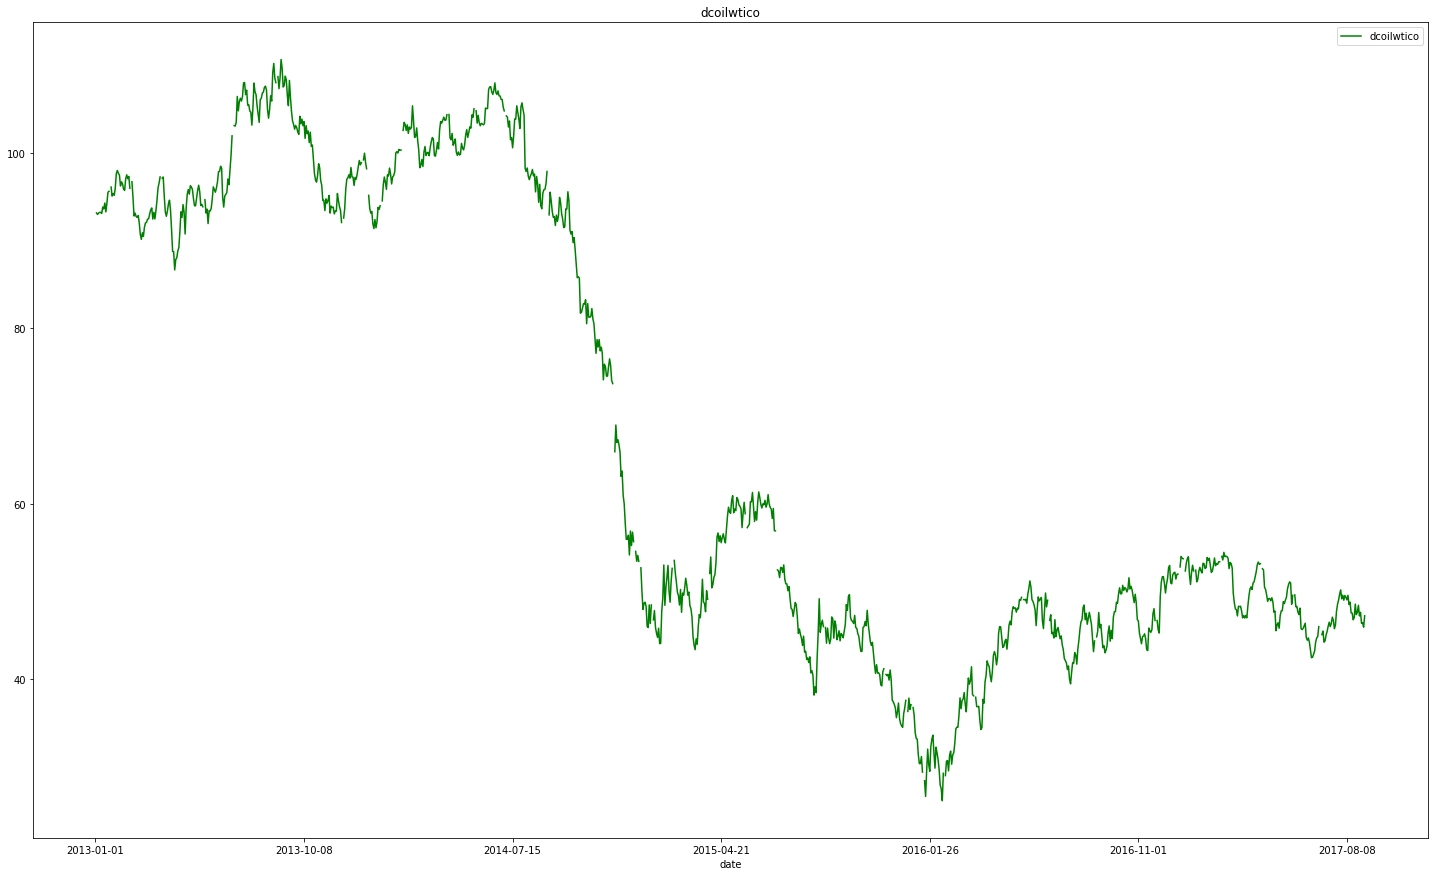

In [7]:
df_oil = pd.read_csv('oil.csv')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25,15))
df_oil.plot.line(x="date", y="dcoilwtico", color='g', title ="dcoilwtico", ax = axes, rot=0)
plt.show()

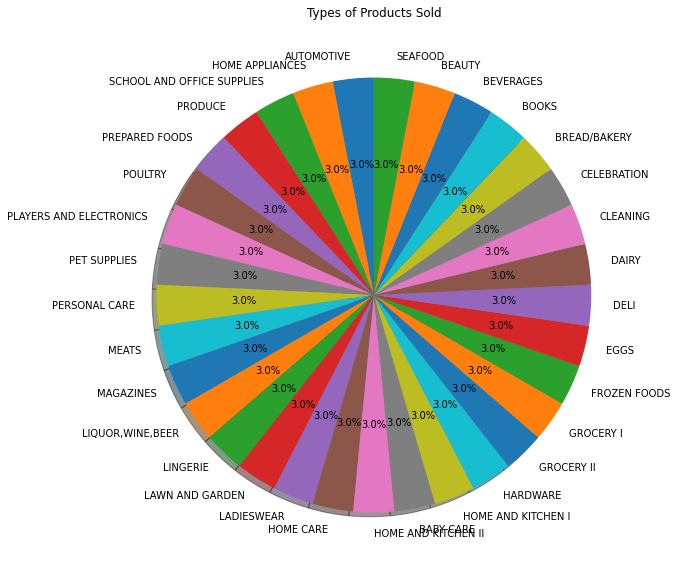

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
count_classes = df_train['family'].value_counts()
plt.title("Types of Products Sold")


plt.pie(count_classes, 
        labels = count_classes.index, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90)

plt.show()

# Linear Regression with Time Series

In [59]:
df = pd.read_csv('train.csv')
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [60]:
df_store1 = df.loc[df['store_nbr']==1]
df_store1

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000000,0
1,1,2013-01-01,1,BABY CARE,0.000000,0
2,2,2013-01-01,1,BEAUTY,0.000000,0
3,3,2013-01-01,1,BEVERAGES,0.000000,0
4,4,2013-01-01,1,BOOKS,0.000000,0
...,...,...,...,...,...,...
2999134,2999134,2017-08-15,1,POULTRY,234.892000,0
2999135,2999135,2017-08-15,1,PREPARED FOODS,42.822998,0
2999136,2999136,2017-08-15,1,PRODUCE,2240.230000,7
2999137,2999137,2017-08-15,1,SCHOOL AND OFFICE SUPPLIES,0.000000,0


In [61]:
store1_produce = df_store1.loc[df['family']=='PRODUCE']
store1_produce

,id,date,store_nbr,family,sales,onpromotion
30,30,2013-01-01,1,PRODUCE,0.000,0
1812,1812,2013-01-02,1,PRODUCE,0.000,0
3594,3594,2013-01-03,1,PRODUCE,0.000,0
5376,5376,2013-01-04,1,PRODUCE,0.000,0
7158,7158,2013-01-05,1,PRODUCE,0.000,0
...,...,...,...,...,...,...
2992008,2992008,2017-08-11,1,PRODUCE,1115.334,7
2993790,2993790,2017-08-12,1,PRODUCE,1762.493,7
2995572,2995572,2017-08-13,1,PRODUCE,986.669,5
2997354,2997354,2017-08-14,1,PRODUCE,2611.755,9


In [62]:
store1_produce['Time'] = np.arange(len(store1_produce))
store1_produce

/tmp/ipykernel_24/1277425574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1_produce['Time'] = np.arange(len(store1_produce))


,id,date,store_nbr,family,sales,onpromotion,Time
30,30,2013-01-01,1,PRODUCE,0.000,0,0
1812,1812,2013-01-02,1,PRODUCE,0.000,0,1
3594,3594,2013-01-03,1,PRODUCE,0.000,0,2
5376,5376,2013-01-04,1,PRODUCE,0.000,0,3
7158,7158,2013-01-05,1,PRODUCE,0.000,0,4
...,...,...,...,...,...,...,...
2992008,2992008,2017-08-11,1,PRODUCE,1115.334,7,1679
2993790,2993790,2017-08-12,1,PRODUCE,1762.493,7,1680
2995572,2995572,2017-08-13,1,PRODUCE,986.669,5,1681
2997354,2997354,2017-08-14,1,PRODUCE,2611.755,9,1682


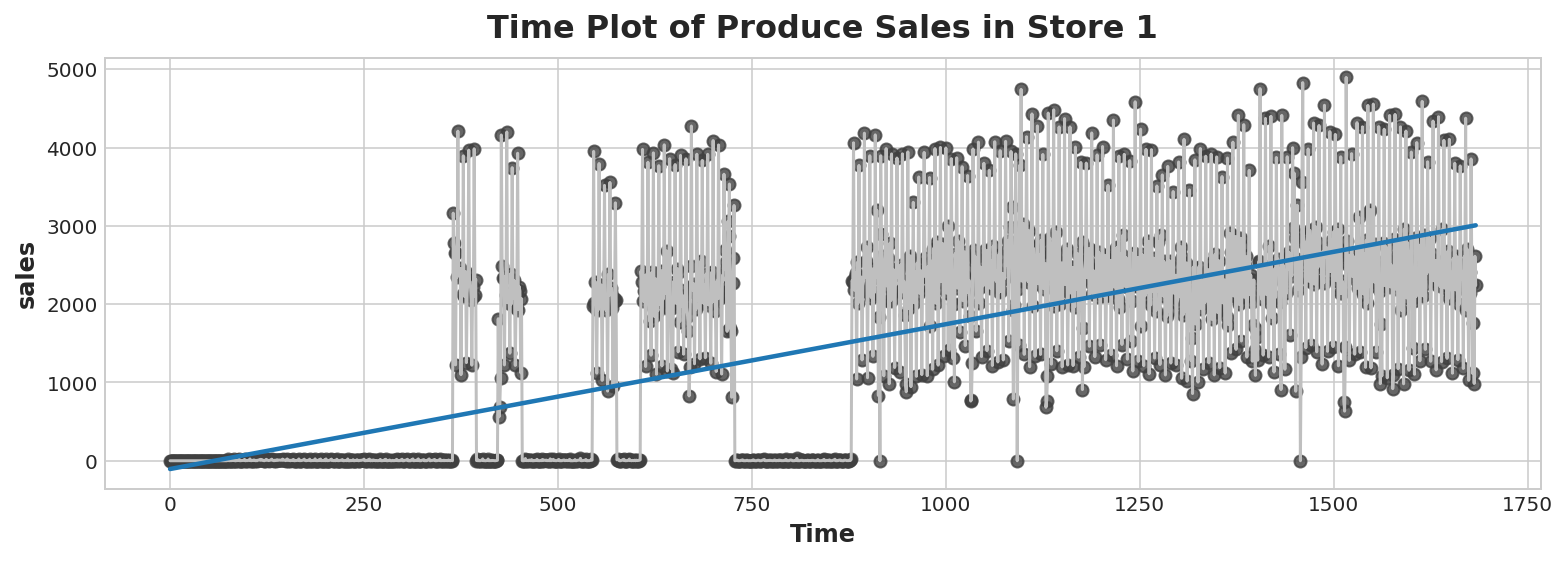

In [64]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'sales', data=store1_produce, color='0.75')
ax = sns.regplot(x='Time', y='sales', data=store1_produce, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Produce Sales in Store 1');

## Time Dependence

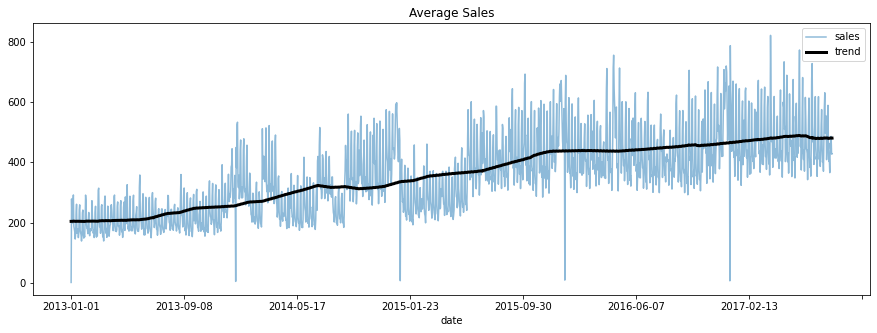

In [17]:
average_sales = df_train.groupby('date').mean()['sales']
trend = average_sales.rolling(window=365,center=True,min_periods=183,).mean()
fig, ax = plt.subplots(figsize=(15,5))
average_sales.plot(alpha=0.5, title="Average Sales", ax=ax)
trend.plot(linewidth=3, label='trend', color='k', ax=ax)
ax.grid(False)
ax.legend()

Training RMSLE: 0.32472
Validation RMSLE: 0.18144


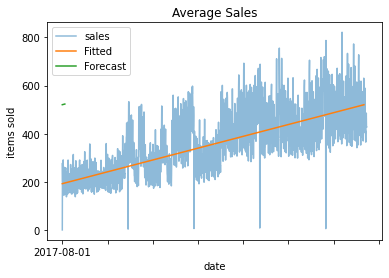

In [30]:
y = average_sales.copy()
dp = DeterministicProcess(index=y.index,constant=True,order=1,drop=True,)
X = dp.in_sample()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=15, shuffle=False)

model = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_fit = pd.Series(model.predict(X_train), index=X_train.index).clip(0.0)
y_pred = pd.Series(model.predict(X_valid), index=X_valid.index).clip(0.0)

rmsle_train = mean_squared_log_error(y_train, y_fit) ** 0.5
rmsle_valid = mean_squared_log_error(y_valid, y_pred) ** 0.5
print(f'Training RMSLE: {rmsle_train:.5f}')
print(f'Validation RMSLE: {rmsle_valid:.5f}')

ax = y.plot(alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_fit.plot(ax=ax, label="Fitted", color='C1')
ax = y_pred.plot(ax=ax, label="Forecast",color='C2')
ax.legend()

## Seasonality

In [34]:
# average_sales2 = (df_train.groupby('date').mean().squeeze().loc['2017'])
# X = average_sales2.to_frame()
# X
# # X["week"] = X.index.week
# # X["day"] = X.index.dayofweek
# # seasonal_plot(X, y='sales', period='week', freq='day')

/home/alex_nanez/.local/lib/python3.8/site-packages/learntools/time_series/utils.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(


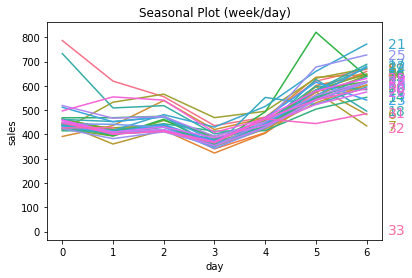

In [41]:
from learntools.time_series.utils import plot_periodogram, seasonal_plot
holidays_events = pd.read_csv('holidays_events.csv',
    dtype={
        'type': 'category',
        'locale': 'category',
        'locale_name': 'category',
        'description': 'category',
        'transferred': 'bool',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
holidays_events = holidays_events.set_index('date').to_period('D')

store_sales = pd.read_csv('train.csv',
    usecols=['store_nbr', 'family', 'date', 'sales'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,)

store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()
average_sales2 = (
    store_sales
    .groupby('date').mean()
    .squeeze()
    .loc['2017']
)
X = average_sales2.to_frame()
X["week"] = X.index.week
X["day"] = X.index.dayofweek
seasonal_plot(X, y='sales', period='week', freq='day');

/tmp/ipykernel_91/841079489.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  plot_periodogram(average_sales)


<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

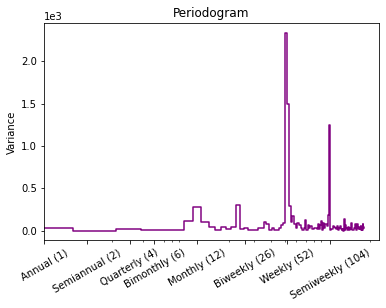

In [42]:
plot_periodogram(average_sales)

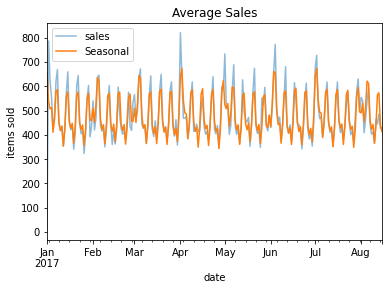

In [45]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
y = average_sales.copy()
fourier = CalendarFourier(freq='M',order=4)
dp = DeterministicProcess(index=y.index,constant=True,order=1,seasonal=True,additional_terms=[fourier],drop=True,)
X = dp.in_sample()

model = LinearRegression().fit(X, y)
y_pred = pd.Series(model.predict(X),index=X.index,name='Fitted',)

y_pred = pd.Series(model.predict(X), index=X.index)
ax = y.plot(alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax.legend()

## Deseasonalizing

/tmp/ipykernel_91/1825686527.py:4: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  ax1 = plot_periodogram(y, ax=ax1)
/tmp/ipykernel_91/1825686527.py:6: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  ax2 = plot_periodogram(y_deseason, ax=ax2);


Text(0.5, 1.0, 'Deseasonalized')

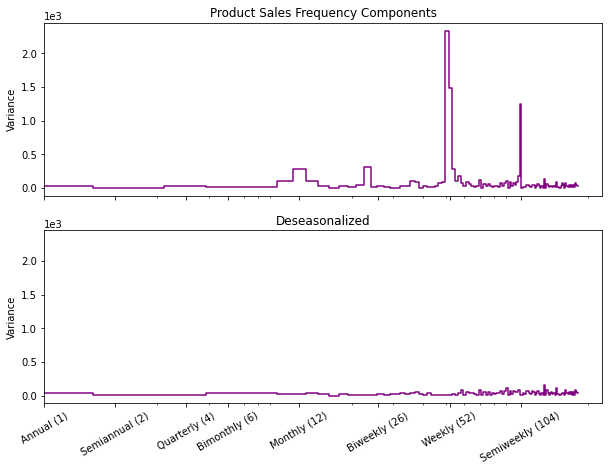

In [48]:
y_deseason = y - y_pred

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))
ax1 = plot_periodogram(y, ax=ax1)
ax1.set_title("Product Sales Frequency Components")
ax2 = plot_periodogram(y_deseason, ax=ax2);
ax2.set_title("Deseasonalized")

Text(0.5, 1.0, 'National and Regional Holidays')

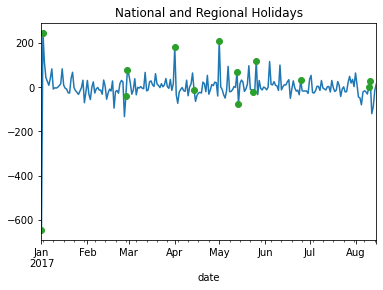

In [58]:
holidays = (holidays_events.query("locale in ['National', 'Regional']").loc['2017':'2017-08-15', ['description']].assign(description=lambda x: x.description.cat.remove_unused_categories()))
ax = y_deseason.plot()
plt.plot_date(holidays.index, y_deseason[holidays.index], color='C2')
ax.set_title('National and Regional Holidays')

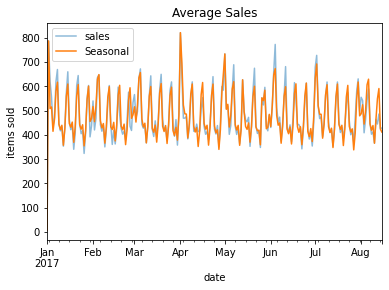

In [59]:
# Fitting seasonal model with holiday features.
X_holidays = pd.get_dummies(holidays)
X2 = X.join(X_holidays, on='date').fillna(0.0)
model = LinearRegression().fit(X2, y)
y_pred = pd.Series(model.predict(X2),index=X2.index,name='Fitted',)

y_pred = pd.Series(model.predict(X2), index=X2.index)
ax = y.plot(alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax.legend()
# Returns better fitted values

## Hybrid Models

In [71]:
# Creating BoostedHybrid class and fit and predict methods
class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2
        self.y_columns = None
def fit(self, X_1, X_2, y):
    self.model_1.fit(X_1,y)

    y_fit = pd.DataFrame(self.model_1.predict(X_1),index=X_1.index, columns=y.columns,)

    y_resid = y-y_fit
    y_resid = y_resid.stack().squeeze()

    self.model_2.fit(X_2,y_resid)

    self.y_columns = y.columns
    self.y_fit = y_fit
    self.y_resid = y_resid
BoostedHybrid.fit = fit
def predict(self, X_1, X_2):
    y_pred = pd.DataFrame(self.model_1.predict(X_1),index=X_1.index, columns=self.y_columns,)
    y_pred = y_pred.stack().squeeze()

    y_pred += self.model_2.predict(X_2)
    
    return y_pred.unstack()
BoostedHybrid.predict = predict

In [72]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
# Setting up data needed for training
family_sales = (store_sales.groupby(['family', 'date']).mean().unstack('family').loc['2017'])

# Target series
y = family_sales.loc[:, 'sales']

# X_1: Features for Linear Regression
dp = DeterministicProcess(index=y.index, order=1)
X_1 = dp.in_sample()

# X_2: Features for XGBoost
X_2 = family_sales.drop('sales', axis=1).stack()  # onpromotion feature

# Label encoding for 'family'
le = LabelEncoder()
X_2 = X_2.reset_index('family')
X_2['family'] = le.fit_transform(X_2['family'])

# Label encoding for seasonality
X_2["day"] = X_2.index.day

In [73]:
# Training
model = BoostedHybrid(model_1=LinearRegression(),model_2=XGBRegressor())

#model.fit(X_1, X_2, y)
#y_pred = model.predict(X_1,X_2)

#y_pred = y_pred.clip(0.0)

y_train, y_valid = y[:"2017-07-01"], y["2017-07-02":]
X1_train, X1_valid = X_1[: "2017-07-01"], X_1["2017-07-02" :]
X2_train, X2_valid = X_2.loc[:"2017-07-01"], X_2.loc["2017-07-02":]

# Predictions
model.fit(X1_train, X2_train, y_train)
y_fit = model.predict(X1_train, X2_train).clip(0.0)
y_pred = model.predict(X1_valid, X2_valid).clip(0.0)

families = y.columns[0:6]
axs = y.loc(axis=1)[families].plot(
    subplots=True, sharex=True, figsize=(11, 9), **plot_params, alpha=0.5,
)
_ = y_fit.loc(axis=1)[families].plot(subplots=True, sharex=True, color='C0', ax=axs)
_ = y_pred.loc(axis=1)[families].plot(subplots=True, sharex=True, color='C3', ax=axs)
for ax, family in zip(axs, families):
    ax.legend([])
    ax.set_ylabel(family)

XGBoostError: [09:47:16] ../src/data/data.cc:707: Check failed: labels.Shape(0) == num_row_ (6006 vs. 0) : Size of labels must equal to number of rows.
Stack trace:
  [bt] (0) /home/alex_nanez/.local/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x1fcf29) [0x7f72acff8f29]
  [bt] (1) /home/alex_nanez/.local/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x202f95) [0x7f72acffef95]
  [bt] (2) /home/alex_nanez/.local/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x2dd42d) [0x7f72ad0d942d]
  [bt] (3) /home/alex_nanez/.local/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x2dda34) [0x7f72ad0d9a34]
  [bt] (4) /home/alex_nanez/.local/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7f72acf29f90]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.7(+0x6ff5) [0x7f734d3c1ff5]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.7(+0x640a) [0x7f734d3c140a]
  [bt] (7) /usr/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(_ctypes_callproc+0x5b6) [0x7f734d3e3316]
  [bt] (8) /usr/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0x139ec) [0x7f734d3e39ec]

